<a href="https://colab.research.google.com/github/cahayairham/Pemrograman-Python/blob/main/ImageClassification2_Cahaya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [3]:
ls

 11546999.jpg             dataset@
 3scene@                  datasetfix/
 47391014_303.jpg        'download (1).jpg'
'ANN try1.ipynb'          ImageClassification2_Cahaya.ipynb
 autobahn-2-bj6u.jpg      ImageClassification_Cahaya.ipynb
 costa-rica-737x426.jpg   nnmodel_scene/
 dataIC2/                 Untitled0.ipynb


In [4]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [5]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("datasetfix")
data = []
labels = []

[INFO] loading images...


In [6]:
for imagePath in imagePaths:
	image = Image.open(imagePath)
 
  #preprocessing

	image = np.array(image.resize((128, 128))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [7]:
print(labels)

['GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06',

In [8]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [9]:
print(labels)

[[0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 ...
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]]


In [10]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(441, 128, 128, 3)
(148, 128, 128, 3)


In [49]:
from keras.layers import Convolution2D, MaxPool2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(16, (5,5), activation='relu', input_shape=(128,128,3)))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(32, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(64, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(128, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))

#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 124, 124, 16)      1216      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 62, 62, 16)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 60, 60, 32)        4640      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 12, 12, 128)      

In [50]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [54]:
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=50, batch_size=32)

Epoch 1/50
14/14 [==============================] - 0s 20ms/step - loss: 0.0478 - accuracy: 0.9819 - val_loss: 1.0057 - val_accuracy: 0.7432
Epoch 2/50
14/14 [==============================] - 0s 15ms/step - loss: 0.0390 - accuracy: 0.9841 - val_loss: 1.1509 - val_accuracy: 0.7162
Epoch 3/50
14/14 [==============================] - 0s 14ms/step - loss: 0.0387 - accuracy: 0.9841 - val_loss: 0.9105 - val_accuracy: 0.8041
Epoch 4/50
14/14 [==============================] - 0s 14ms/step - loss: 0.0311 - accuracy: 0.9909 - val_loss: 1.0600 - val_accuracy: 0.7568
Epoch 5/50
14/14 [==============================] - 0s 14ms/step - loss: 0.0120 - accuracy: 0.9977 - val_loss: 1.0327 - val_accuracy: 0.7703
Epoch 6/50
14/14 [==============================] - 0s 14ms/step - loss: 0.0128 - accuracy: 0.9977 - val_loss: 1.0970 - val_accuracy: 0.7770
Epoch 7/50
14/14 [==============================] - 0s 14ms/step - loss: 0.0073 - accuracy: 1.0000 - val_loss: 1.3278 - val_accuracy: 0.7432
Epoch 8/50
14

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


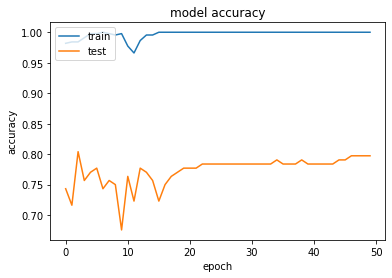

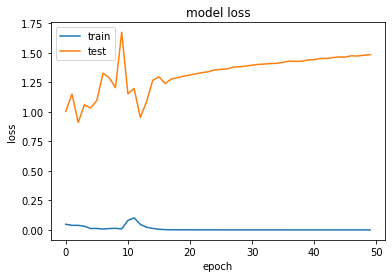

In [55]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [56]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.77      0.82      0.79        33
      GMB_02       0.71      0.75      0.73        20
      GMB_04       0.91      0.91      0.91        34
      GMB_06       0.71      0.69      0.70        29
      GMB_08       0.83      0.78      0.81        32

    accuracy                           0.80       148
   macro avg       0.79      0.79      0.79       148
weighted avg       0.80      0.80      0.80       148



In [16]:
model1.save('nnmodel_scene')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: nnmodel_scene/assets


In [17]:
import cv2
import matplotlib.pyplot as plt
image1='forest_test.jpg'

TypeError: ignored

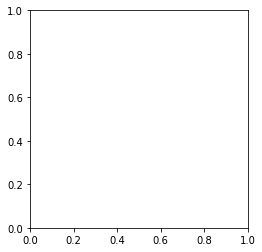

In [18]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [ ]:
image_testing = Image.open('forest_test.jpg')
image_testing = np.array(image_testing.resize((64, 64))) / 255.0
image_testing.shape

In [ ]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

In [ ]:
output = model.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])